# Detectores de bordas
Adaptado dos exemplos de Moacir A. Ponti, ICMC/USP, 2021)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img4_pb = cv2.cvtColor(cv2.imread("lena.png"), cv2.COLOR_BGR2GRAY) 

# Filter2D

Sintaxe: 

filter2D (src, dst, ddepth, kernel)

#### Parâmetros:

* Src – A imagem de origem na qual aplicar o filtro.
* Dst – Nome da imagem de saída após a aplicação do filtro
* Ddepth – Profundidade da imagem de saída [-1 dará a profundidade da imagem de saída igual à imagem de entrada]
* Kernel – A matriz 2D com a qual queremos que a imagem convolua.


Usando esta função, podemos criar uma convolução entre a imagem e o kernel fornecido para criar filtros como suavização e desfoque, nitidez e detecção de borda em uma imagem. Esta função irá simplesmente convoluir a matriz 2D com a imagem em nível de pixel e produzir uma imagem de saída. Para entender esse conceito, primeiro examinaremos o conceito de kernel.

## Sobel

Text(0.5, 1.0, 'Sobel')

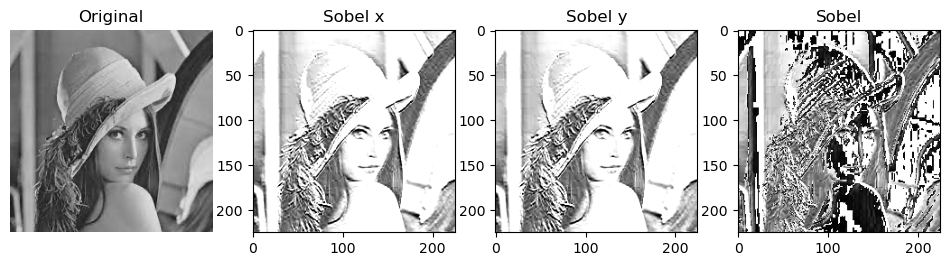

In [3]:
import math

kernelx = np.array([[1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

#ao invés de usar a função convolucional dos exemplos acima, vc define o valor do filtro e usa no filter2D
img_sobelx = cv2.filter2D(img4_pb, -1, kernelx)
img_sobely = cv2.filter2D(img4_pb, -1, kernely)
img_sobel = img_sobelx + img_sobely

plt.figure(figsize = (12, 12)) 

plt.subplot(141)
plt.imshow(img4_pb, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Original")
plt.axis('off')

plt.subplot(142)
plt.imshow(img_sobelx, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Sobel x")

plt.subplot(143)
plt.imshow(img_sobelx, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Sobel y")

plt.subplot(144)
plt.imshow(img_sobel, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Sobel")

Text(0.5, 1.0, 'Original')

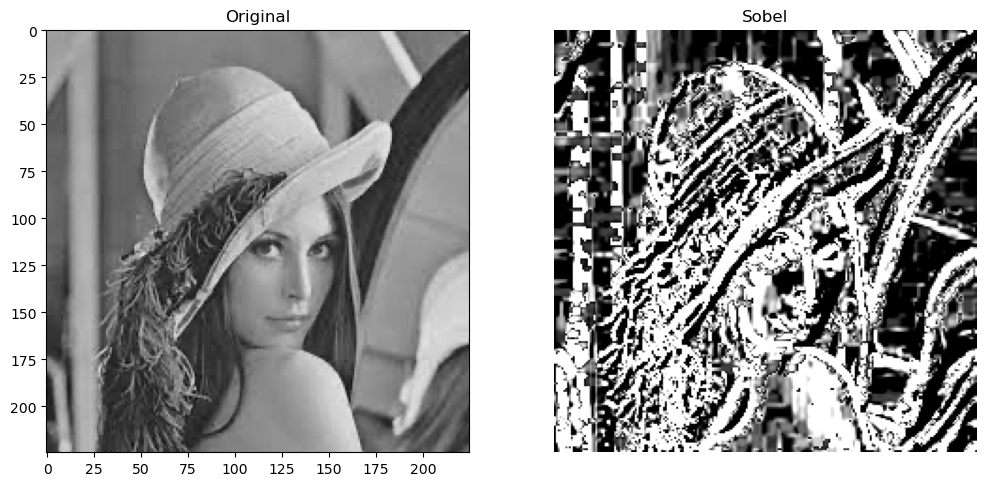

In [4]:
# 5x5 (ksize)

img_sobelx = cv2.Sobel(img4_pb, cv2.CV_8U, 1, 0, ksize = 5)
img_sobely = cv2.Sobel(img4_pb, cv2.CV_8U, 0, 1, ksize = 5)
sobel = img_sobelx + img_sobely

plt.figure(figsize = (12, 12))

plt.subplot(122)
plt.imshow(sobel, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Sobel")
plt.axis('off')

plt.subplot(121)
plt.imshow(img4_pb, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Original")

## Prewitt

Text(0.5, 1.0, 'Prewitt')

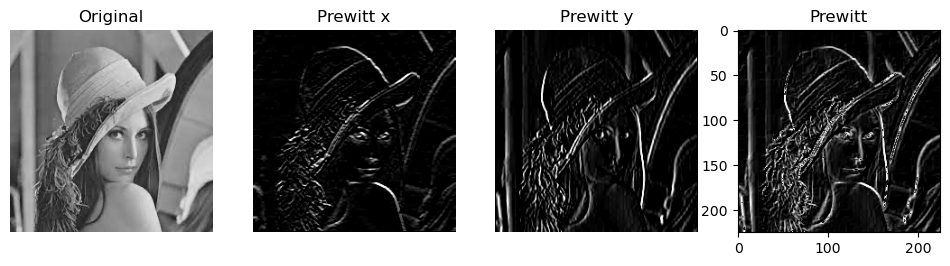

In [5]:
#FIltro de Prewitt não tem no opencv, mas é so definir o valor do filtro x e y e somar os dois. 
import math

kernelx = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
kernely = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])

img_prewittx = cv2.filter2D(img4_pb, -1, kernelx)
img_prewitty = cv2.filter2D(img4_pb, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

plt.figure(figsize = (12, 12))

plt.subplot(141)
plt.imshow(img4_pb, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Original")
plt.axis('off')

plt.subplot(142)
plt.imshow(img_prewittx, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Prewitt x")
plt.axis('off')

plt.subplot(143)
plt.imshow(img_prewitty, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Prewitt y")
plt.axis('off')

plt.subplot(144)
plt.imshow(img_prewitt, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Prewitt")


Text(0.5, 1.0, 'Roberts')

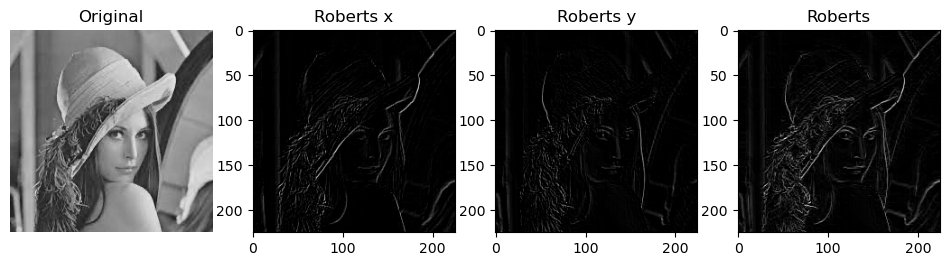

In [6]:
#Filtro de Prewitt não tem no opencv, mas é so definir o valor do filtro x e y e somar os dois. 
import math

kernelx = np.array([[1, 0], [0, -1]])
kernely = np.array([[0, 1], [-1 ,0]])

img_robertsx = cv2.filter2D(img4_pb, -1, kernelx)
img_robertsy = cv2.filter2D(img4_pb, -1, kernely)
img_roberts = img_robertsx + img_robertsy

plt.figure(figsize = (12, 12)) 

plt.subplot(141)
plt.imshow(img4_pb, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Original")
plt.axis('off')

plt.subplot(142)
plt.imshow(img_robertsx, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Roberts x")

plt.subplot(143)
plt.imshow(img_robertsy, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Roberts y")

plt.subplot(144)
plt.imshow(img_roberts, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Roberts")

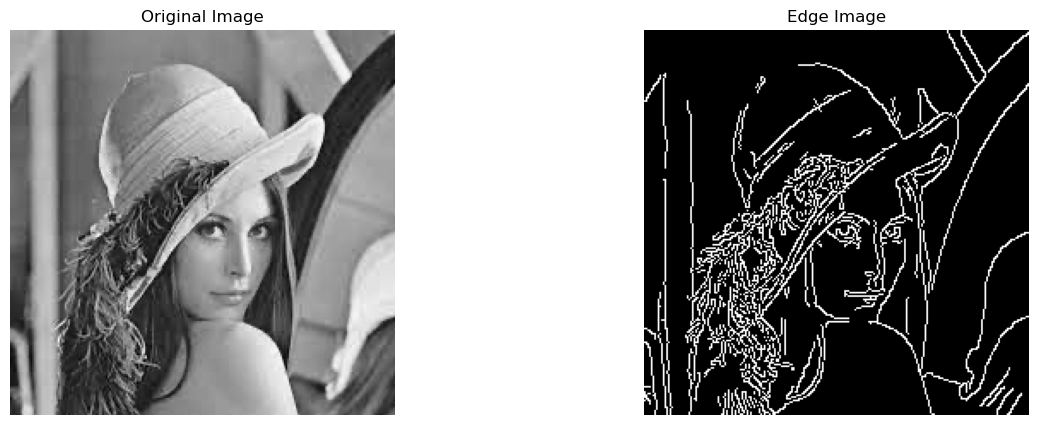

In [7]:
# Filtro de Canny

edges = cv2.Canny(img4_pb, 100, 200)

fig, ax = plt.subplots(ncols = 2,figsize = (15, 5))

ax[0].imshow(img4_pb,cmap = 'gray')
ax[0].set_title('Original Image') 
ax[0].axis('off')

ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title('Edge Image')
ax[1].axis('off')
plt.show()

(-0.5, 224.5, 224.5, -0.5)

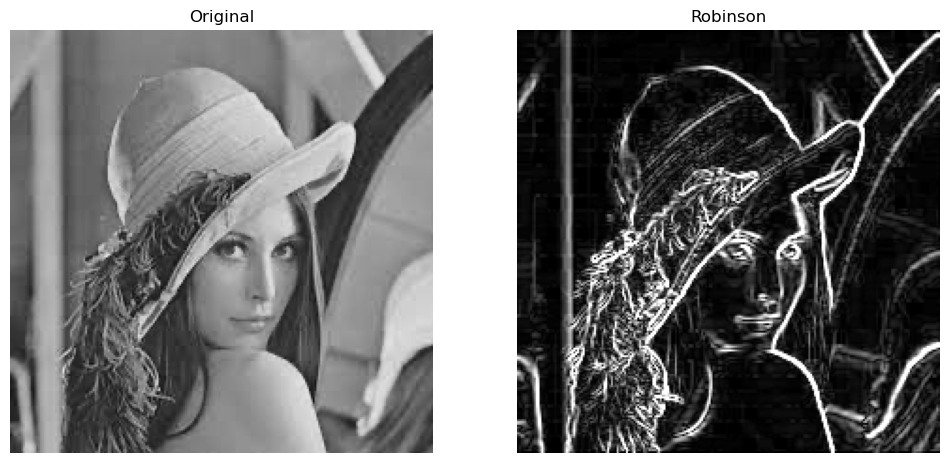

In [8]:
#Filtro de Robinson

msk1 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
msk2 = np.array([[2, 1, 0], [1, 0, -1], [0, -1, -2]])
msk3 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
msk4 = np.array([[0, -1, -2], [1, 0, -1], [2, 1, 0]])
msk5 = msk1 * -1
msk6 = msk2 * -1
msk7 = msk3 * -1
msk8 = msk4 * -1

img_rob1 = cv2.filter2D(img4_pb, -1, msk1)
img_rob2 = cv2.filter2D(img4_pb, -1, msk2)
img_rob3 = cv2.filter2D(img4_pb, -1, msk3)
img_rob4 = cv2.filter2D(img4_pb, -1, msk4)
img_rob5 = cv2.filter2D(img4_pb, -1, msk5)
img_rob6 = cv2.filter2D(img4_pb, -1, msk6)
img_rob7 = cv2.filter2D(img4_pb, -1, msk7)
img_rob8 = cv2.filter2D(img4_pb, -1, msk8)

img_robinsonMax1 = np.maximum(img_rob1, img_rob2, img_rob3)
img_robinsonMax2 = np.maximum(img_rob4, img_rob5, img_rob6)
img_robinsonMax3 = np.maximum(img_rob7, img_rob8)

img_robinson = np.maximum(img_robinsonMax1, img_robinsonMax2, img_robinsonMax3)


plt.figure(figsize = (12, 12)) 

plt.subplot(121)
plt.imshow(img4_pb, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_robinson, cmap = "gray", vmin = 0, vmax = 255)
plt.title("Robinson")
plt.axis('off')